# Example Notebook for BHPTNRSur2dq1e3

This notebook shows how to use the BHPTNRSur2dq1e3 model. The model was trained on point-particle black hole perturbation theory (BHPT) waveforms and calibrated to NR in the comparable mass ratio regime. 

For more information, please see [here](https://bhptoolkit.org/BHPTNRSurrogate/).

# Lesson 1: Setup
 
1. You should now have the programs git and Jupyter as well as the Python packages scipy and h5py
2. clone the BHPTSurrogate repo

```shell
>>> git clone https://github.com/BlackHolePerturbationToolkit/BHPTNRSurrogate.git
```

3. Download the h5 file using the following public link and move it to ```BHPTNRSurrogate/data/```

```
https://www.dropbox.com/scl/fo/hyli37hr8c8wn8iq3p85z/AExZRxZrY6HX5756IdAVeGU?rlkey=n06hodoapvlrx0b6lxfrfbst6
```

Alternatively, the code will automatically do it for you. (Update later)

In [2]:
!wget -O ../../data/BHPTNRSur2dq1e3.h5 https://www.dropbox.com/scl/fo/hyli37hr8c8wn8iq3p85z/AExZRxZrY6HX5756IdAVeGU?rlkey=n06hodoapvlrx0b6lxfrfbst6

--2024-07-23 10:48:45--  https://www.dropbox.com/scl/fo/hyli37hr8c8wn8iq3p85z/AExZRxZrY6HX5756IdAVeGU?rlkey=n06hodoapvlrx0b6lxfrfbst6
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb47e87997138c52648845bd805.dl.dropboxusercontent.com/zip_download_get/B6o5r046lbCSsyATy0YeqSSi-l0gjQHxKGRsb8NPctev6OEi8Aa4HCnP2idBRN-UFf24adTJQYf1DrrjpW2rDWE9UmfKi-4VpiSPEUwoogxOTw# [following]
--2024-07-23 10:48:46--  https://ucb47e87997138c52648845bd805.dl.dropboxusercontent.com/zip_download_get/B6o5r046lbCSsyATy0YeqSSi-l0gjQHxKGRsb8NPctev6OEi8Aa4HCnP2idBRN-UFf24adTJQYf1DrrjpW2rDWE9UmfKi-4VpiSPEUwoogxOTw
Resolving ucb47e87997138c52648845bd805.dl.dropboxusercontent.com (ucb47e87997138c52648845bd805.dl.dropboxusercontent.com)... 162.125.4.15, 2620:100:6019:15::a27d:40f
Connecting to ucb47e87997138c52648845bd805.dl.dropbo

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

# provide the path to the BHPTNRSurrogate directory
#PATH_TO_BHPTNRSur = "/work/pi_gkhanna_uri_edu/riteshbachhar_uri_edu/Research/Surrogate/BHPTNRSurrogate"
# PATH_TO_BHPTNRSur = "/home/balzani57/Repo/GitRepos/Codes/BHPTNRSurrogate-katie/BHPTNRSurrogate/"
PATH_TO_BHPTNRSur = "/data/tislam/pool/code_review/BHPTNRSurrogate/"
sys.path.append(PATH_TO_BHPTNRSur+"/surrogates")

import BHPTNRSur2dq1e3 as bhptsur

**** Surrogate loaded ****


In [2]:
# print out the documentation
help(bhptsur.generate_surrogate)

Help on function generate_surrogate in module BHPTNRSur2dq1e3:

generate_surrogate(q, spin1=0.0, spin2=None, ecc=None, ano=None, modes=None, M_tot=None, dist_mpc=None, orb_phase=None, inclination=None, neg_modes=False, mode_sum=False, lmax=4, calibrated=True)
    ## -------------------------------------------------------------------------- ##
    ## general overview
    ## -------------------------------------------------------------------------- ##
    
    Description : wrapper to generate BHPT surrogate waveforms
    
    Input
    =====
    q: mass ratio (with q:=m_1/m_2>=1 where m_1 is the mass of the larger black hole 
                   and m_2 is the mass of the smaller black hole)
    
    chi1: dimensionless spin of the primary black hole where -1 <= chi1 <= 1
          Default: None
    
    chi2: dimensionless spin of the secondary black hole where -1 <= chi2 <= 1
          Default: None
          Not Implemented in any model so far
    
    ecc: eccentricity / Default: Non

# Lesson 2: Calling the model

Here we showcase a few different ways of calling the model

### 1. Generate uncalibrated waveforms (only 0PA effect) in geometric units

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


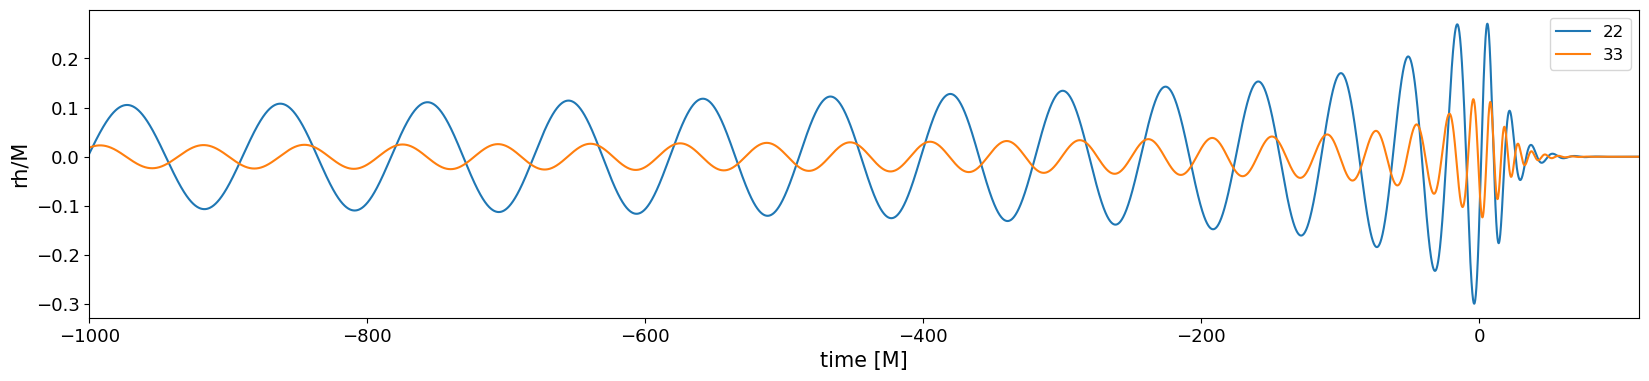

In [3]:
tsur, hsur = bhptsur.generate_surrogate(q=5.0, spin1=0.2, calibrated=False)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlim(-1000,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 2. Generate NR-calibrated waveforms in geometric units

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


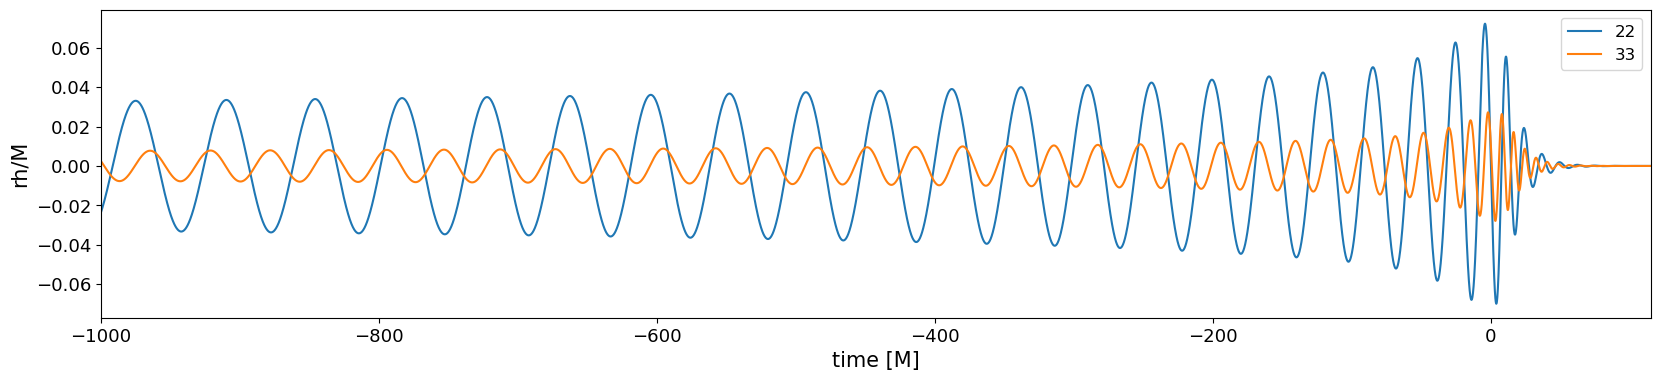

In [4]:
tsur, hsur = bhptsur.generate_surrogate(q=20, spin1=0.5)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlim(-1000,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


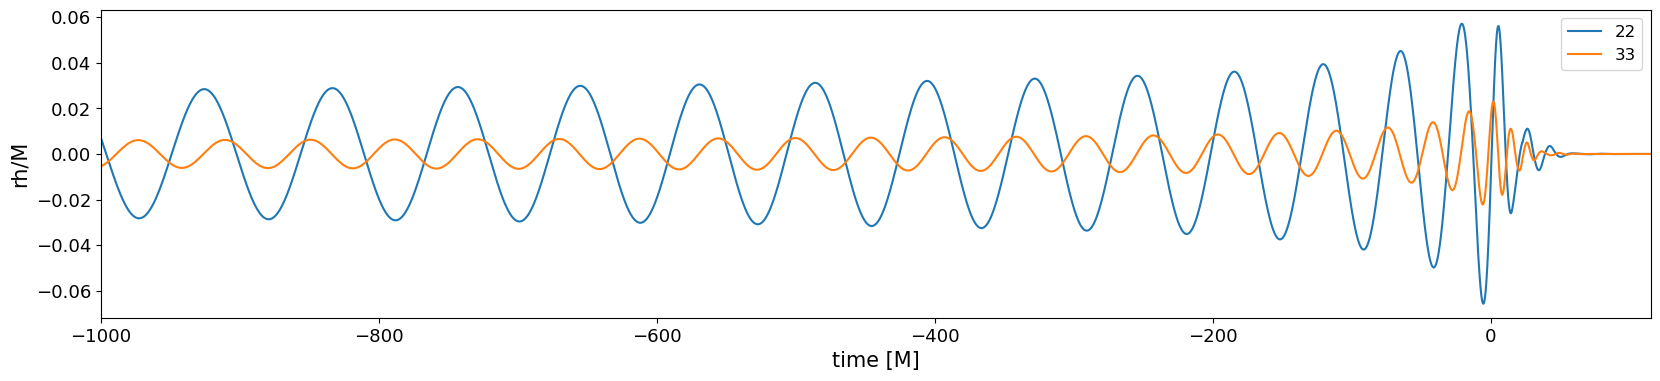

In [5]:
tsur, hsur = bhptsur.generate_surrogate(q=20, spin1=-0.5)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlim(-1000,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 3. Generate (NR calibrated) waveform modes in Physical (SI) units

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


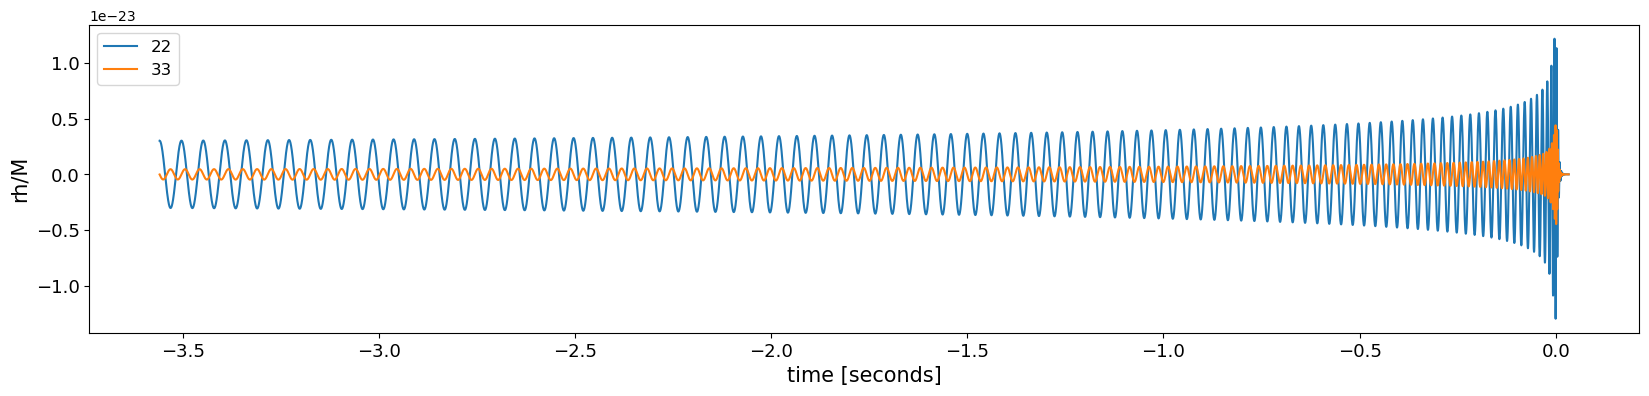

In [6]:
tsur, hsur = bhptsur.generate_surrogate(q=10, spin1=0.3, M_tot=60, dist_mpc=100)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [seconds]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 4. Generate (NR calibrated) waveform modes in Physical (SI) units evaluated at point in the sky

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


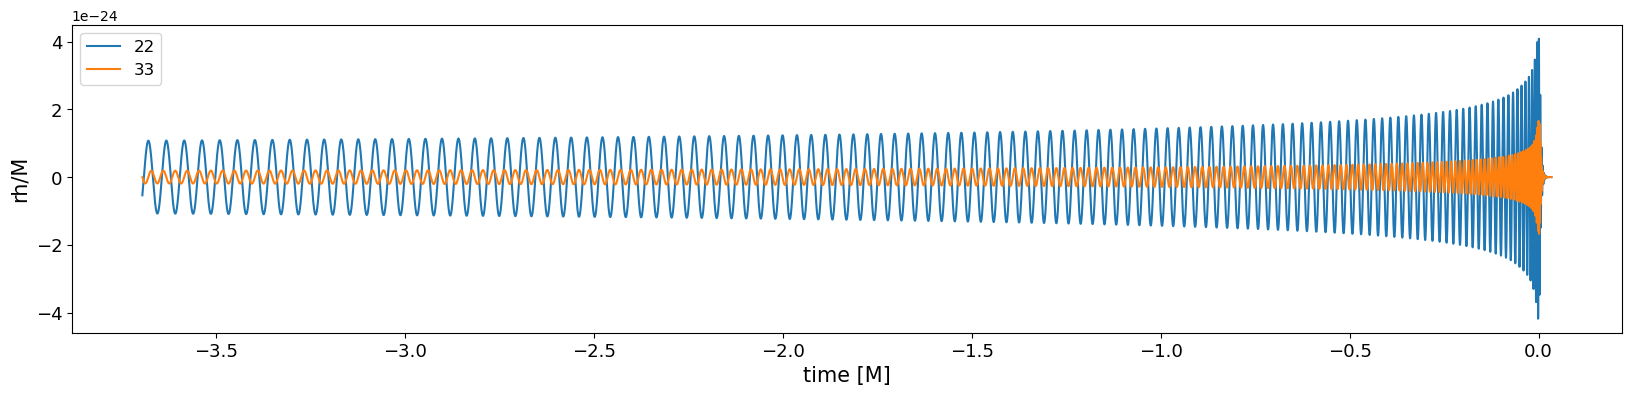

In [7]:
tsur, hsur = bhptsur.generate_surrogate(q=15, spin1=0.7, M_tot=60, dist_mpc=100, orb_phase=np.pi/3, inclination=np.pi/4)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

#### 4.1. Check for phase=0, inclination=0, 33 mode is zero

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


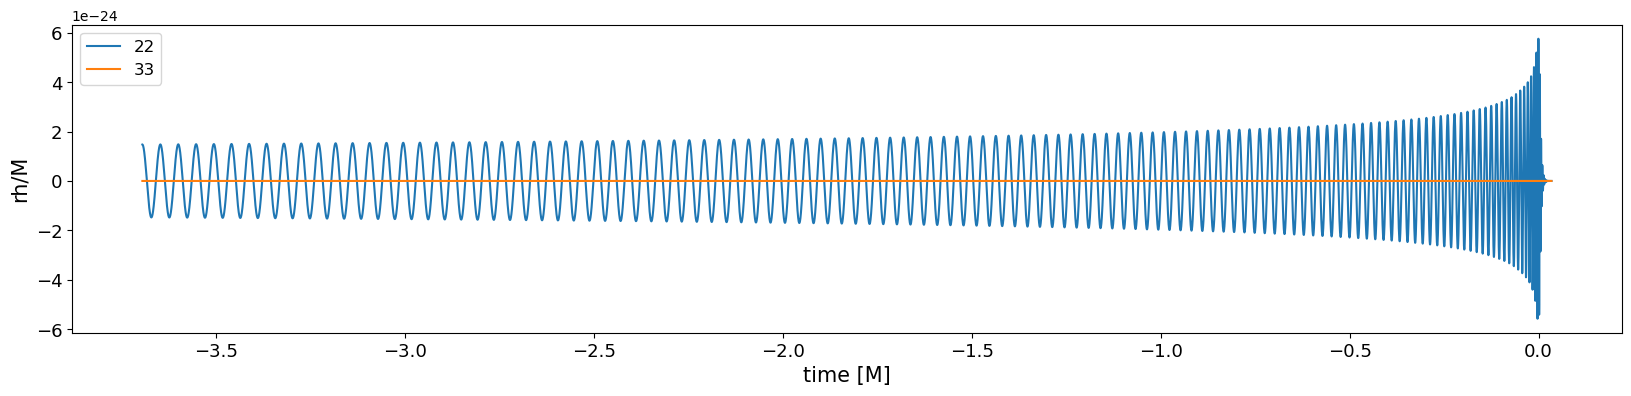

In [8]:
tsur, hsur = bhptsur.generate_surrogate(q=15, spin1=0.7, M_tot=60, dist_mpc=100, orb_phase=0.0, inclination=0.0)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 5. Generate (NR calibrated) waveform in Physical (SI) units on a sphere for a given set of modes

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


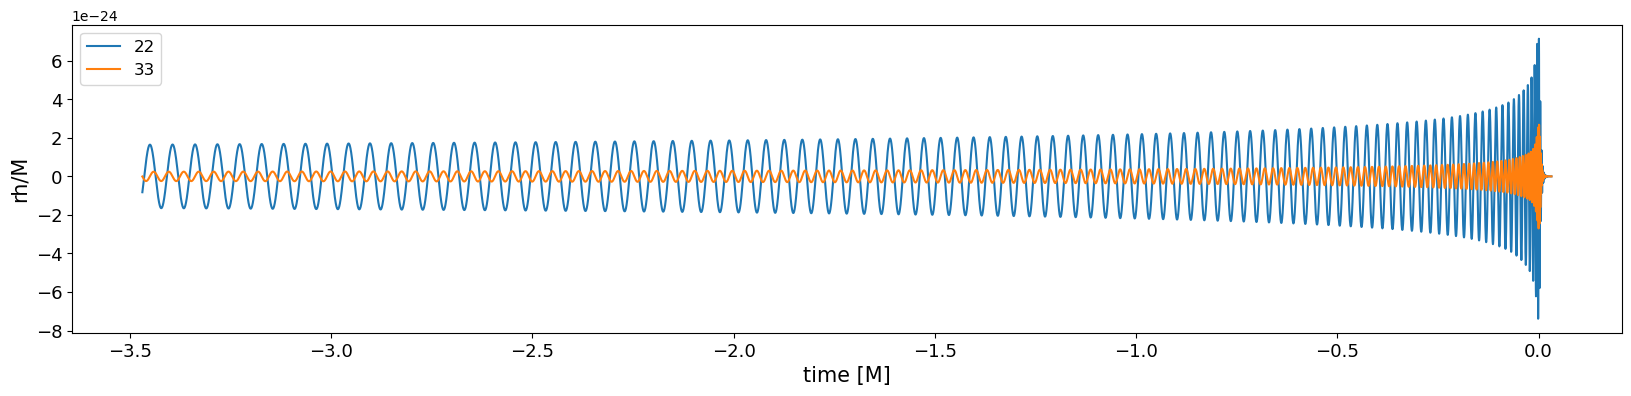

In [9]:
# Note : (2,2) mode should always be in the mode_list; otherwise it will throw errors
modes = [(2,2),(3,3),(4,4),(5,5)]

tsur, hsur = bhptsur.generate_surrogate(q=8, spin1=0.7, M_tot=60, dist_mpc=100, orb_phase=np.pi/3, inclination=np.pi/4)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 6. Generate (NR calibrated) waveform in Physical (SI) units on a sphere for possible modes upto l=3

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3)])


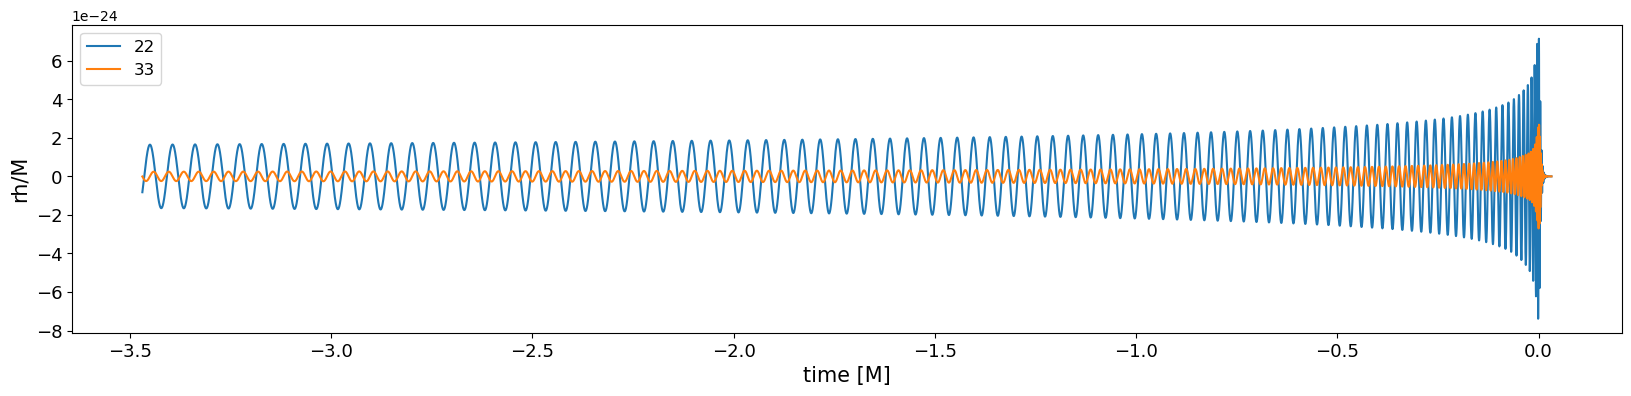

In [11]:
lmax = 3 # Note default value of lmax is 5; because we have NR calibrated modes up to l=5
tsur, hsur = bhptsur.generate_surrogate(q=8, spin1=0.7, M_tot=60, dist_mpc=100, orb_phase=np.pi/3, inclination=np.pi/4, lmax=3)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 7. Generate mode-summed (NR calibrated) waveform in Physical (SI) units on a sphere for possible modes upto l=3

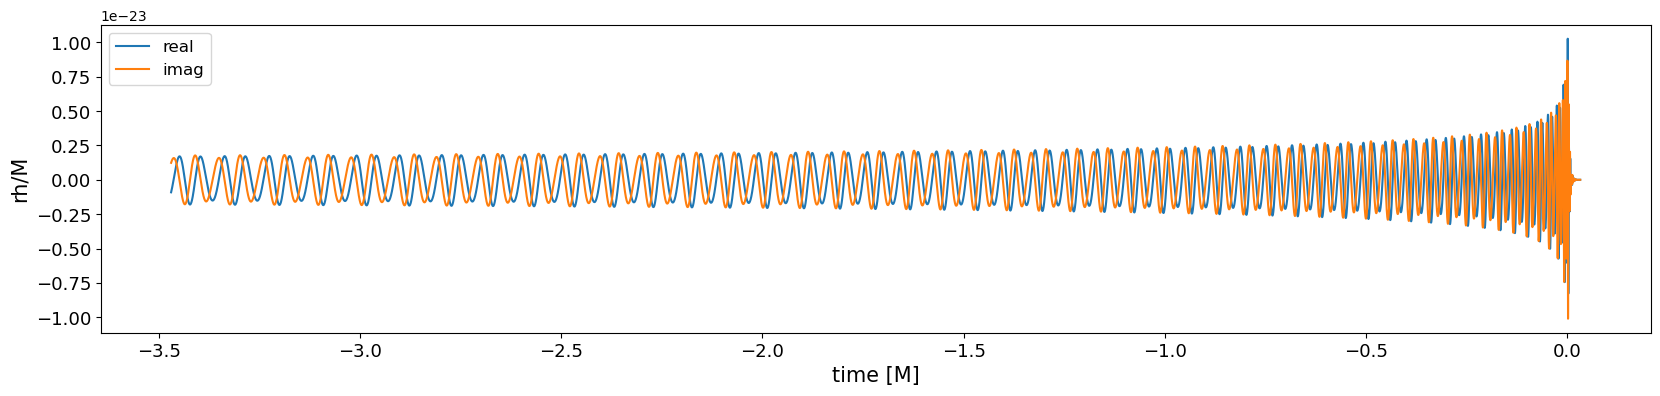

In [12]:
lmax = 3 # Note default value of lmax is 5; because we have NR calibrated modes up to l=5
tsur, hsur = bhptsur.generate_surrogate(q=8, spin1=0.7, M_tot=60, dist_mpc=100, orb_phase=np.pi/3, inclination=np.pi/4, lmax=3, mode_sum=True)


plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur), '-', label='real')
plt.plot(tsur, np.imag(hsur), '-', label='imag')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

# Lesson 4: Reproducing results from the paper

Here we reproduce a few results from the arXiv paper

### 1. Inspect the BHPTNRSur2dq1e4 model-calibration parameters

By default, the BHPTNRSurrogate package will return rescaled waveform modes,
$$
\begin{align}
h^{\ell,m}_{\tt S, \alpha,\beta}(t ; q)= {\alpha_{\ell}} h^{\ell,m}_{\tt S}\left( t \beta;q \right) \,,
\end{align}
$$
where the calibration parameters, $\alpha_{\ell}(q, \chi_1)$ and $\beta(q, \chi_1)$, are tuned to NR simulations.

Lets first check that the values provided with the BHPTNRSurrogate package match the tables in the paper

In [15]:
import pprint

# Data structure layout is [A1, A2, A3, A4, B1, B2], which can be seen by 
# inspecting the input ordering of bhptsur.nrcalib.alpha_beta_BHPTNRSur2dq1e3()
pprint.pprint(bhptsur.alpha_coeffs)
print(bhptsur.beta_coeffs)

{(2, 2): array([-1.15397324,  1.48758115, -3.35617643,  4.36611547, -0.01502512,
       -0.0665036 ]),
 (3, 3): array([-2.70721357,  3.45771825, -4.26626015,  5.48741687,  0.        ,
        0.        ]),
 (4, 4): array([ -3.22349039,   2.97668803,   5.98484158, -13.090528  ,
         0.        ,   0.        ])}
[-1.21099811  1.31265337 -0.8174404  -0.07336478 -0.02433145  0.00328884]


### 2. Compare the BHPTNRSur2dq1e3 model with an [NR Surrogate model](https://link.aps.org/accepted/10.1103/PhysRevD.99.064045) called with [GWSurrogate ](https://github.com/sxs-collaboration/gwsurrogate/tree/master)

This is figure 7 from the arXiv paper

In [6]:
import gwtools as gwt
import gwsurrogate as gws
from gwtools.gwtools import minimize_norm_error_multi_mode
from gwtools.mismatch import mathcal_E_error_from_mode_dict

setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


In [7]:
# Load the NR surrogate model
nrsur     = gws.LoadSurrogate("NRHybSur3dq8")

Loaded NRHybSur3dq8 model


In [8]:
nrsur??

Signature:     
nrsur(
    q,
    chiA0,
    chiB0,
    M=None,
    dist_mpc=None,
    f_low=None,
    f_ref=None,
    dt=None,
    df=None,
    times=None,
    freqs=None,
    mode_list=None,
    ellMax=None,
    inclination=None,
    phi_ref=0,
    precessing_opts=None,
    tidal_opts=None,
    par_dict=None,
    units='dimensionless',
    skip_param_checks=False,
    taper_end_duration=None,
)
Type:           NRHybSur3dq8
String form:    <gwsurrogate.surrogate.NRHybSur3dq8 object at 0x7f4750e1a6a0>
File:           /opt/jupyter-hub/anaconda3/lib/python3.9/site-packages/gwsurrogate/surrogate.py
Source:        
class NRHybSur3dq8(SurrogateEvaluator):
    """
A class for the NRHybSur3dq8 surrogate model presented in Varma et al. 2018,
arxiv:1812.07865.

Evaluates gravitational waveforms generated by aligned-spin binary black hole
systems. This model was built using numerical relativity (NR) waveforms that
have been hybridized using post-Newtonian (PN) and effective one body (EOB)
wavefo

In [19]:
# Mass ratio
q = 6

# Spin on BH1
spin1 = 0.6

# Evaluate the BHPTNRSur2dq1e3 model without calibration
tbhpt_raw, hbhpt_raw = bhptsur.generate_surrogate(q=q, spin1=spin1, calibrated=False)

# Evaluate the BHPTNRSur2dq1e3 model with NR calibration
tbhpt, hbhpt = bhptsur.generate_surrogate(q=q, spin1=spin1, calibrated=True)

# Evaluate the NRHybSur3dq8 model
times = np.arange(-5000.1, 130,.1)
tnr, hnr, dyn = nrsur(q, chiA0=[0, 0.0, spin1], chiB0=[0.0, 0.0, 0.0], f_low=0.005, f_ref=None, times=times)

# Requested list of modes used in the comparison
mode_list = [(2, 2), (2, 1), (3, 3), (4, 4)]

hnr = {mode: hnr[mode] for mode in mode_list}
hbhpt = {mode: hbhpt[mode] for mode in mode_list}

In [20]:
# multi-modal match
[errors_before_min, errors_after_min], [tc, phic], [common_times,h_bhpt_aligned,h_nr_aligned] = \
                            minimize_norm_error_multi_mode(tbhpt, hbhpt, tnr, hnr, mode_list=None, ell_m_match=(2,2),\
                                    t_low_adj=0,t_up_adj=0,method='nelder-mead')

In [21]:
# compute error in each mode -- These are the values CalE_{IMR} shown in each figure
modelist = [(2,2),(3,3),(4,4)]
for mode in modelist:
    tmp = gwt.mismatch.mathcal_E_error_from_mode_list(h_nr_aligned[mode],h_bhpt_aligned[mode])
    print("mode (%i, %i) error = %f"%(mode[0],mode[1], tmp))

# compute error in each mode weighted by full multi-modal norm (Eq 21; https://arxiv.org/pdf/1701.00550.pdf)
# This shows that an error of 0.026 in the (4,4) mode (see above) is alternatively understood as an 
# error of 4e-5 then we consider the full waveform in the time-domain. 
relative_mode_errors = gwt.mismatch.mathcal_E_mode_contributions_from_mode_dict(h_nr_aligned,h_bhpt_aligned)
print(relative_mode_errors)

mode (2, 2) error = 0.004173
mode (3, 3) error = 0.019799
mode (4, 4) error = 0.069016
{(2, 2): 0.004011774882503344, (2, 1): 0.0007532720771592823, (3, 3): 0.0006345651127662043, (4, 4): 0.0001993920079861351}


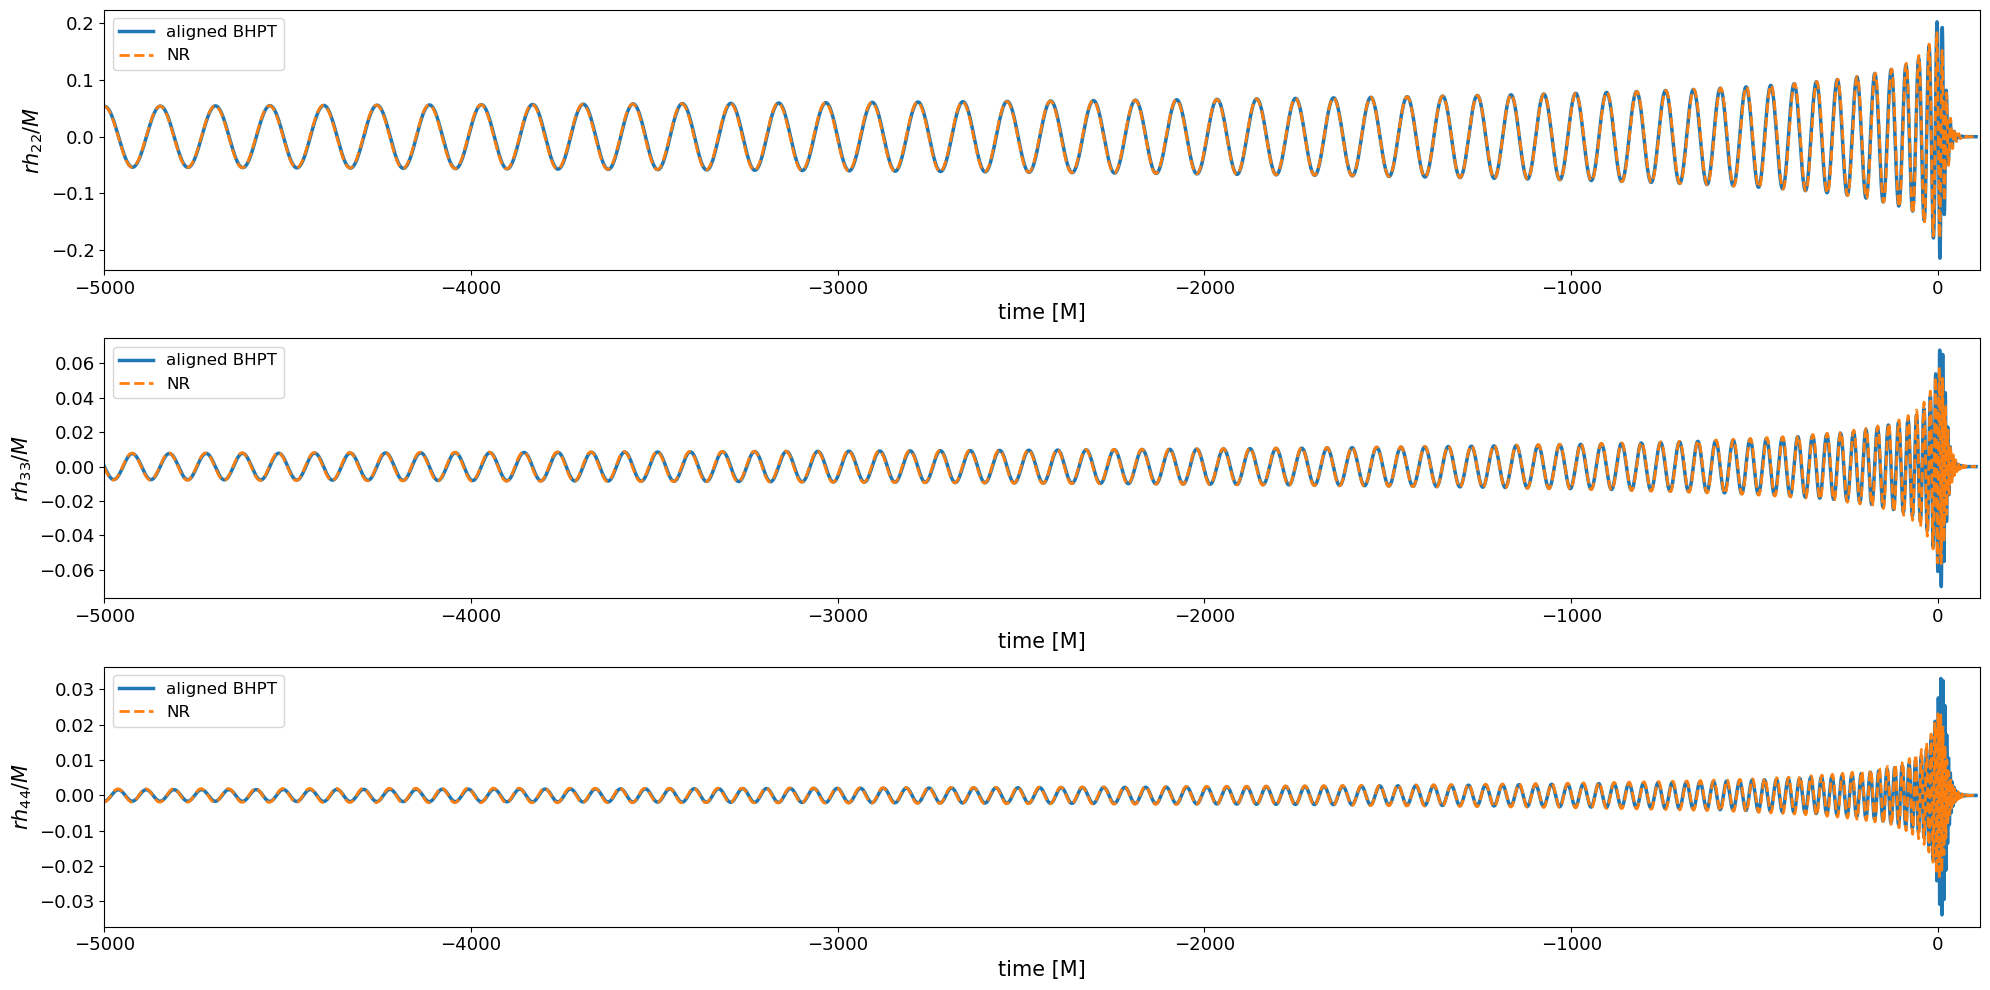

In [22]:
tstart = -5000

plt.figure(figsize=(20,10))

plt.subplot(311)
plt.plot(common_times, np.real(h_bhpt_aligned[(2,2)]), '-', lw=2.5, label='aligned BHPT')
plt.plot(common_times, np.real(h_nr_aligned[(2,2)]), '--', lw=2.0, label='NR')
plt.xlim(tstart,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel(r'$rh_{22}/M$', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)

plt.subplot(312)
plt.plot(common_times, np.real(h_bhpt_aligned[(3,3)]), '-', lw=2.5, label='aligned BHPT')
plt.plot(common_times, np.real(h_nr_aligned[(3,3)]), '--', lw=2.0, label='NR')
plt.xlim(tstart,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel(r'$rh_{33}/M$', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)

plt.subplot(313)
plt.plot(common_times, np.real(h_bhpt_aligned[(4,4)]), '-', lw=2.5, label='aligned BHPT')
plt.plot(common_times, np.real(h_nr_aligned[(4,4)]), '--', lw=2.0, label='NR')
plt.xlim(tstart,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel(r'$rh_{44}/M$', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

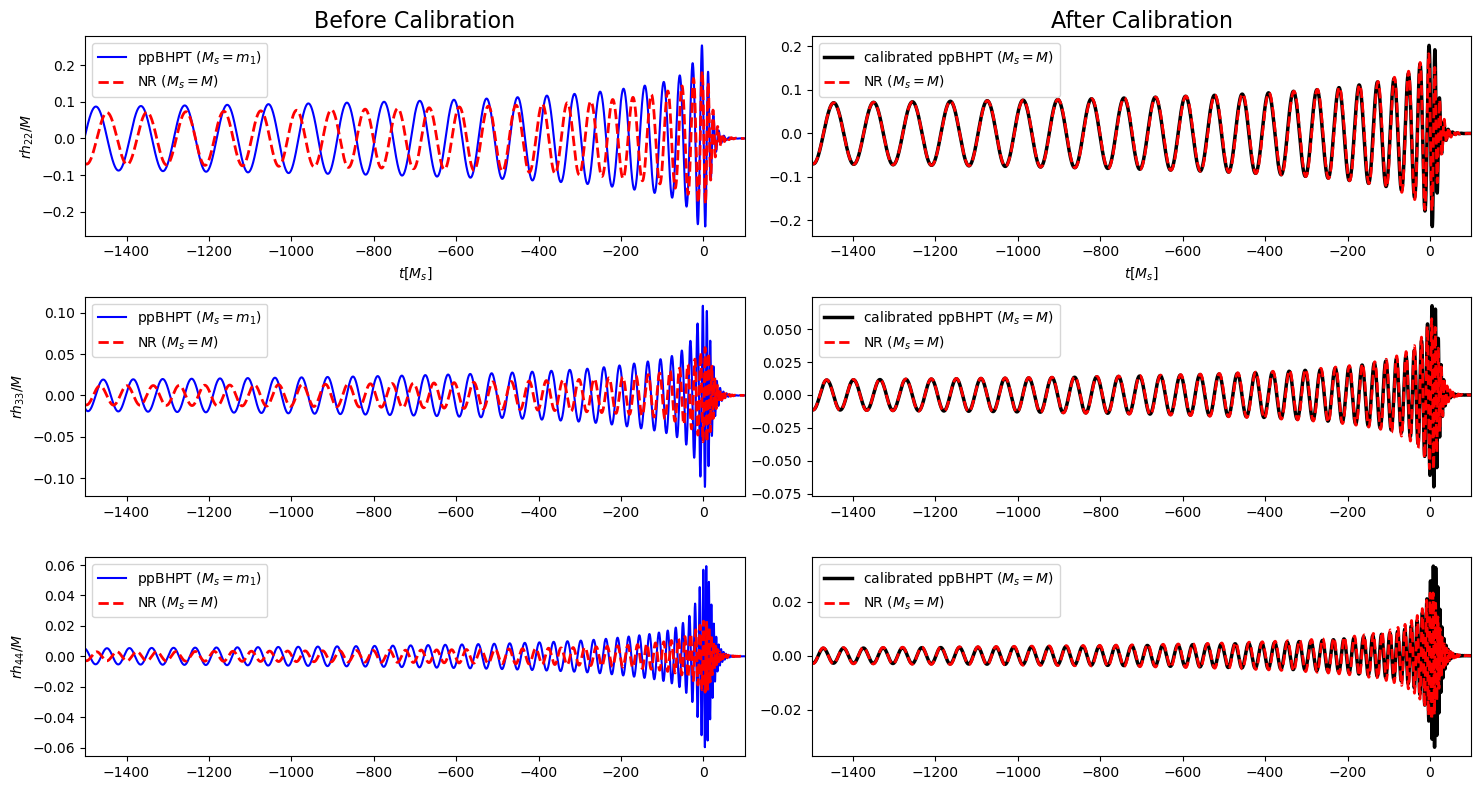

In [23]:
fig, axs = plt.subplots(3, 2, figsize=(15,8))

# Set default text sizes
plt.rcParams['axes.titlesize'] = 16  # Set title size
plt.rcParams['axes.labelsize'] = 14  # Set x and y labels size
plt.rcParams['xtick.labelsize'] = 10  # Set xtick label size
plt.rcParams['ytick.labelsize'] = 10  # Set ytick label size

modelist = [(2,2),(3,3),(4,4)]

for i, mode in enumerate(modelist):
    axs[i,0].plot(tbhpt_raw, np.real(hbhpt_raw[mode]), 'b-', lw=1.5, label=r'ppBHPT ($M_s = m_1$)')
    axs[i,0].plot(tnr, np.real(hnr[mode]), 'r--', lw=2.0, label=r'NR ($M_s = M$)')
    axs[i,0].legend()
    axs[i,0].set_xlim(-1500,100)
    mode_str = ''.join(str(e) for e in mode)
    axs[i,0].set_ylabel(rf'$rh_{{{mode_str}}}/M$',)
    
    axs[i,1].plot(common_times, np.real(h_bhpt_aligned[mode]), 'k-', lw=2.5, label=r'calibrated ppBHPT ($M_s = M$)')
    axs[i,1].plot(common_times, np.real(h_nr_aligned[mode]), 'r--', lw=2.0, label=r'NR ($M_s = M$)')
    axs[i,1].legend()
    axs[i,1].set_xlim(-1500,100)
    mode_str = ''.join(str(e) for e in mode)
    axs[i,0].set_ylabel(rf'$rh_{{{mode_str}}}/M$')

axs[0,0].set_title("Before Calibration")
axs[0,1].set_title("After Calibration")
axs[0,0].set_xlabel("$t [M_s]$")
axs[0,1].set_xlabel("$t [M_s]$")

plt.tight_layout()

### Error in (2,2) mode: NR vs BHPTNRSur2dq1e3

Figure 9.a from arXiv xxxx.xxxxx

**Note**: The figures will be slightly different because the paper's figure uses the exact/optimal calibration parameter values, whereas the model used in this notebook employs the fitting formula given by equations (8) and (9) from the paper reference above. 

In [24]:
# Mass ratio
q_list = [3, 5, 8]
spin1_list = [-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

mathcalE_dict_IMR = {}

# NR time grid
times = np.arange(-4200.1, 100,.1)

# NR time grid (inspiral only)
times_inspiral = np.arange(-4200.1, -50,.1)

for i, q in enumerate(q_list):
    mathcalE_list = []
    for spin1 in spin1_list:
        print(f"Mass ratio {q}, spin1 {spin1}")
        
        # Evaluate the BHPTNRSur2dq1e3 model
        tbhpt, hbhpt = bhptsur.generate_surrogate(q=q, spin1=spin1, calibrated=True)

        # Evaluate the NRHybSur3dq8 model
        tnr, hnr, dyn = nrsur(q, chiA0=[0, 0.0, spin1], chiB0=[0.0, 0.0, 0.0], f_low=0.005, f_ref=None, times=times)

        # Requested list of modes for calibration
        mode_list = [(2, 2), (2, 1), (3, 3), (4, 4)]

        hnr          = {mode: hnr[mode] for mode in mode_list}
        hbhpt        = {mode: hbhpt[mode] for mode in mode_list}

        # multi-modal match (full IMR waveform)
        [errors_before_min, errors_after_min], [tc, phic], [common_times,h_bhpt_aligned,h_nr_aligned] = \
                                minimize_norm_error_multi_mode(tbhpt, hbhpt, tnr, hnr, mode_list=None, ell_m_match=(2,2),\
                                        t_low_adj=0,t_up_adj=0,method='nelder-mead')

        mathcalE_list.append(gwt.mismatch.mathcal_E_error_from_mode_list(h_nr_aligned[mode],h_bhpt_aligned[mode]))

    mathcalE_dict_IMR[q]      = mathcalE_list


Mass ratio 3, spin1 -0.5
Mass ratio 3, spin1 -0.4
Mass ratio 3, spin1 -0.3
Mass ratio 3, spin1 -0.2
Mass ratio 3, spin1 -0.1
Mass ratio 3, spin1 0.0
Mass ratio 3, spin1 0.1
Mass ratio 3, spin1 0.2
Mass ratio 3, spin1 0.3
Mass ratio 3, spin1 0.4
Mass ratio 3, spin1 0.5
Mass ratio 5, spin1 -0.5
Mass ratio 5, spin1 -0.4
Mass ratio 5, spin1 -0.3
Mass ratio 5, spin1 -0.2
Mass ratio 5, spin1 -0.1
Mass ratio 5, spin1 0.0
Mass ratio 5, spin1 0.1
Mass ratio 5, spin1 0.2
Mass ratio 5, spin1 0.3
Mass ratio 5, spin1 0.4
Mass ratio 5, spin1 0.5
Mass ratio 8, spin1 -0.5
Mass ratio 8, spin1 -0.4
Mass ratio 8, spin1 -0.3
Mass ratio 8, spin1 -0.2
Mass ratio 8, spin1 -0.1
Mass ratio 8, spin1 0.0
Mass ratio 8, spin1 0.1
Mass ratio 8, spin1 0.2
Mass ratio 8, spin1 0.3
Mass ratio 8, spin1 0.4
Mass ratio 8, spin1 0.5


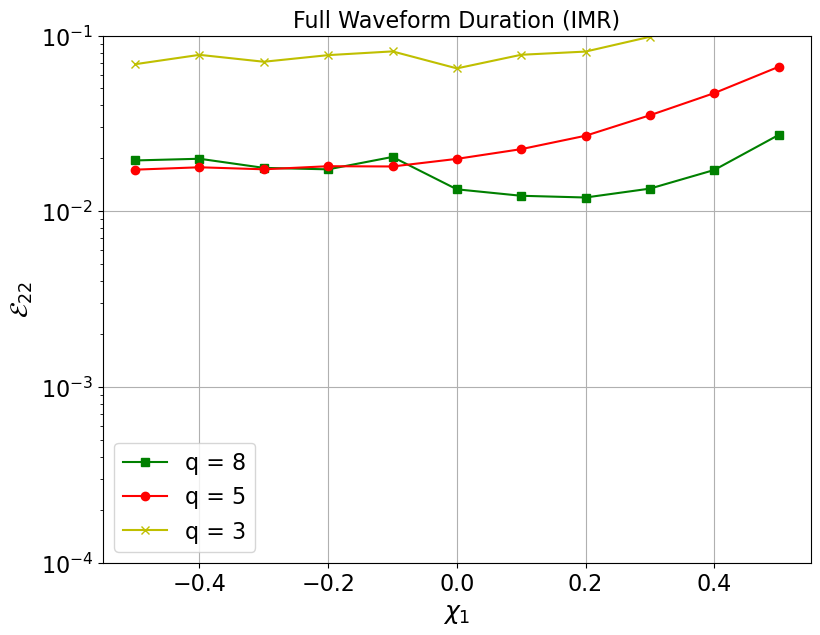

In [25]:
plt.figure(figsize=(8,6))

# Set default text sizes
plt.rcParams['axes.titlesize'] = 16  # Set title size
plt.rcParams['axes.labelsize'] = 18  # Set x and y labels size
plt.rcParams['xtick.labelsize'] = 16  # Set xtick label size
plt.rcParams['ytick.labelsize'] = 16  # Set ytick label size
plt.rcParams['legend.fontsize'] = 16


plt.semilogy(spin1_list, mathcalE_dict_IMR[8], 'g-', marker='s', label='q = 8')
plt.semilogy(spin1_list, mathcalE_dict_IMR[5], 'r-', marker='o', label='q = 5')
plt.semilogy(spin1_list, mathcalE_dict_IMR[3], 'y-', marker='x', label='q = 3')

plt.legend()
plt.ylim(1e-4, 1e-1)
plt.grid()
plt.tight_layout()
plt.xlabel(r'$\chi_1$')
plt.ylabel(r'$\mathcal{E}_{22}$')
plt.title("Full Waveform Duration (IMR)")
plt.show()
